# Hands on **FairGNN**

---
## Get started

If you joined the Tutorial session late... Let's prepare our **workspace**!

The material is included in the [GitHub repository](https://github.com/beyondaccuracy-userprofiling/tutorial-cikm23) of the tutorial (expect for the raw datasets, due to upload limits of GitHub).

⭐ Star the repository if you are interested in this tutorial and its future updated versions.

To get started with the hands-on, follow these steps:

* Open the [Drive folder](https://drive.google.com/drive/folders/18Y0rKw_ORvOGcCw0eP6zaDdXRuTRb-Cf?usp=share_link) containing all the needed resources;
* Click on the folder name (`Hands-on`) and select *Add shortcut to Drive*;
* On the left, go to **My Drive**, locate the `Hands-on` folder;
* Open the notebook named `1_CatGCN.ipynb` (and all the others for the next hands-on sessions);
* On the top, open the *Runtime* tab, click on *Change runtime type* and select **GPU** as the *Harware Acceleration*, to enable the execution of this notebook on a GPU (required for the GNN training);
* Download the [datasets](http://gofile.me/72h0u/qdRw7y26c) for the tutorial and put it in a `datasets` folder inside `Hands-on`.

### Mount the Drive

The first operation is to allow the notebook to access the hands-on files downloaded in your personal Google Drive folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## FairGNN model

In this session, we will describe the most relevant parts of the implementation of the **FairGNN model**, according to its architecture.

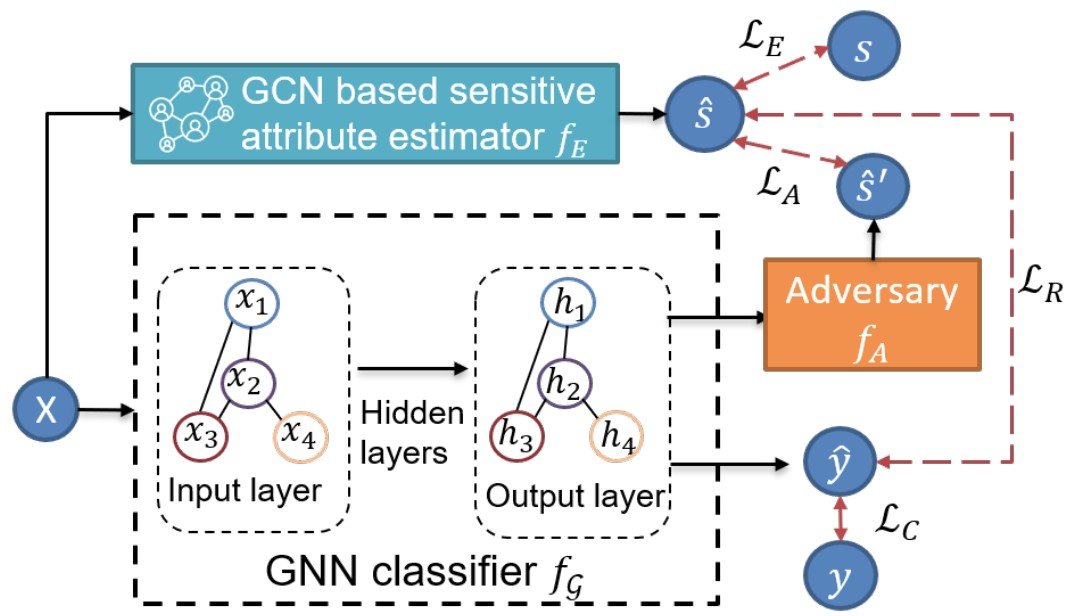

### Training algorithm

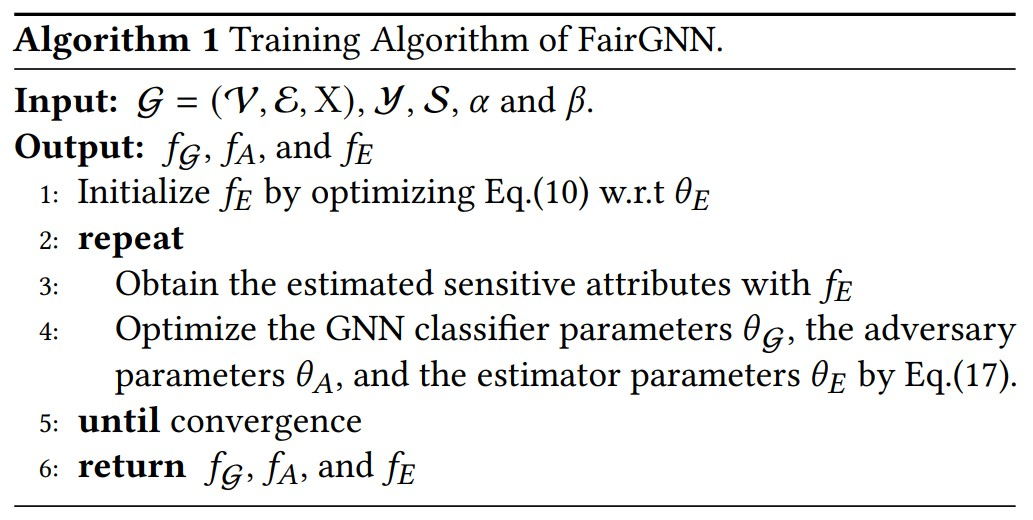

Properties and methods defined in `FairGNN.py`

* GNN model (a GCN or a GAT) $\Rightarrow$ `GNN = get_model(num_features_dataset, args)`
* $f_G$: classifier (connected to the GNN model) $\Rightarrow$ `classifier = nn.Linear(num_hidden_units, 1)`
* $f_E$: Sensitive attribute estimator $\Rightarrow$ `estimator = GCN(num_features_dataset, num_hidden_units_sens_attr_est, 1, dropout)`
* $f_A$: Adversary module $\Rightarrow$ `adv = nn.Linear(num_hidden_units, 1)`
* $\theta_G$ + $\theta_E$: classifier and estimator parameters $\Rightarrow$ `G_params = list(GNN.parameters()) + list(classifier.parameters()) + list(estimator.parameters())`
* $\theta_A$: adversary parameters $\Rightarrow$ `adv.parameters`

### Objective function

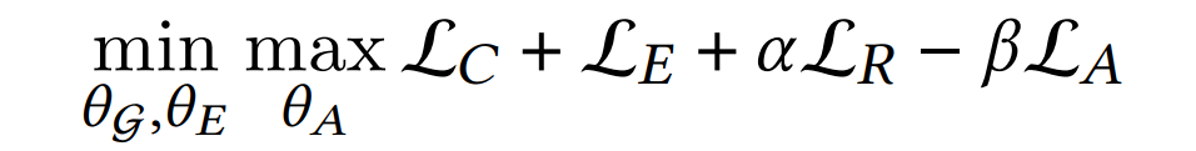

Properties and methods defined in `FairGNN.py`

* The used loss function combines the **cross entropy** with a **sigmoid** function $\Rightarrow$ `criterion = nn.BCEWithLogitLoss()`
* $\mathcal{L}_C$ + $\mathcal{L}_E$: loss function for $f_G$ and loss function for $f_E$ $\Rightarrow$ `cls_loss`
* $\mathcal{L}_A$: loss function for $f_A$ (*adversarial debiasing*) $\Rightarrow$ `adv_loss`
* $\mathcal{L}_R$: this terms indicates the minimization of the absolute covariance between the noisy sensitive attribute $\hat{s}$ and the prediction $\hat{y}$ (it happens when the *statistical parity* is achieved) $\Rightarrow$ `cov`
* $\alpha, \beta$: scalars to control the contributions of the *covariance constraint* and *adversarial debiasing*

```
G_loss = cls_loss + alpha * cov - beta * adv_loss
```

## Running the model

In [ ]:
# Import libraries
import os

# Install missing libraries
!pip install dgl -f https://data.dgl.ai/wheels/cu118/repo.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To run **FairGNN** model, we have to execute the `train_fairGNN.py` file.

The most important parameters to set are the following:

* `--model`: type of GNN classifier to use (`GCN` or `GAT`);
* `--dataset`: dataset to use (`nba`, `pokec_z` or `pokec_n`);
* `--seed`: random seed for train and test splitting;
* `--epochs`: number of epochs for training;
* `--num_hidden`: number of hidden units of classifier;
* `--acc`: the selected FairGNN accuracy on validation set to reach with the training epochs;
* `--roc`: the selected FairGNN ROC score on validation set to reach with the training epochs;
* `--alpha`: hyperparameter to control loss function;
* `--beta`: hyperparameter to control loss function.

⚠️ We already prepared a script for running the model with a set of default parameter values.

Set the model directory path.

In [ ]:
%cd /content/drive/MyDrive/Code/Research/tutorial-cikm23/Hands-on/models/FairGNN/src

💻 Run the script!

In [ ]:
%%shell
. ./scripts/nba/train_fairGCN.sh